## Dataset WikiRoto

In [1]:
import pandas as pd

In [38]:
# wiki roto data : https://github.com/tramy1258/wikiroto/tree/main
wikiroto_dir = '../../more/wikiroto/'

train_df = pd.read_csv(wikiroto_dir + 'data/wikiroto_train_with_table.csv')
test_df = pd.read_csv(wikiroto_dir + 'data/wikiroto_test_with_table.csv')
eval_df = pd.read_csv(wikiroto_dir + 'data/wikiroto_eval_with_table.csv')

wikiroto_df = pd.concat([train_df, test_df, eval_df])

In [3]:
wikiroto_df.head(5)

,input,target,table,movie_info,critics_consensus,new_input
0,WikiRoto: movie_title | Percy Jackson & the Ol...,Percy Jackson & the Olympians: The Lightning T...,"[[""movie_title"", [""Percy"", ""Jackson"", ""&"", ""th...","Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,<table> <movie_title> Percy Jackson & the Olym...
1,WikiRoto: movie_title | Please Give && content...,Please Give is a 2010 dark comedy film written...,"[[""movie_title"", [""Please"", ""Give""]], [""conten...",Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,<table> <movie_title> Please Give </movie_titl...
2,WikiRoto: movie_title | 10 && content_rating |...,10 is a 1979 American romantic comedy film wri...,"[[""movie_title"", [""10""]], [""content_rating"", [...","A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,<table> <movie_title> 10 </movie_title> <conte...
3,WikiRoto: movie_title | 12 Angry Men (Twelve A...,12 Angry Men is a 1957 American courtroom dram...,"[[""movie_title"", [""12"", ""Angry"", ""Men"", ""(Twel...",Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,<table> <movie_title> 12 Angry Men (Twelve Ang...
4,"WikiRoto: movie_title | 10,000 B.C. && content...","10,000 BC is a 2008 American action-adventure ...","[[""movie_title"", [""10"", ""000"", ""B.C.""]], [""con...",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,"<table> <movie_title> 10,000 B.C. </movie_titl..."


In [39]:
wikiroto_df = wikiroto_df[['new_input', 'target', 'table', 'movie_info']]
wikiroto_df = wikiroto_df.rename({'new_input': 'input', 'table':'parent'}, axis=1)
wikiroto_df = wikiroto_df.reset_index(drop=True)
wikiroto_df.head(5)

,input,target,parent,movie_info
0,<table> <movie_title> Percy Jackson & the Olym...,Percy Jackson & the Olympians: The Lightning T...,"[[""movie_title"", [""Percy"", ""Jackson"", ""&"", ""th...","Always trouble-prone, the life of teenager Per..."
1,<table> <movie_title> Please Give </movie_titl...,Please Give is a 2010 dark comedy film written...,"[[""movie_title"", [""Please"", ""Give""]], [""conten...",Kate (Catherine Keener) and her husband Alex (...
2,<table> <movie_title> 10 </movie_title> <conte...,10 is a 1979 American romantic comedy film wri...,"[[""movie_title"", [""10""]], [""content_rating"", [...","A successful, middle-aged Hollywood songwriter..."
3,<table> <movie_title> 12 Angry Men (Twelve Ang...,12 Angry Men is a 1957 American courtroom dram...,"[[""movie_title"", [""12"", ""Angry"", ""Men"", ""(Twel...",Following the closing arguments in a murder tr...
4,"<table> <movie_title> 10,000 B.C. </movie_titl...","10,000 BC is a 2008 American action-adventure ...","[[""movie_title"", [""10"", ""000"", ""B.C.""]], [""con...",Mammoth hunter D'Leh (Steven Strait) has long ...


In [32]:
print(wikiroto_df.shape)
wikiroto_df = wikiroto_df.drop_duplicates()
print(wikiroto_df.shape)

(15884, 4)
(15884, 4)


In [33]:
wikiroto_df.input[0]

'<table> <movie_title> Percy Jackson & the Olympians: The Lightning Thief </movie_title> <content_rating> PG </content_rating> <genres> Action & Adventure, Comedy, Drama, Science Fiction & Fantasy </genres> <wiki_title> Percy Jackson & the Olympians: The Lightning Thief </wiki_title> <directors> Chris Columbus </directors> <authors> Craig Titley </authors> <based_on> The Lightning Thief by Rick Riordan </based_on> <produced_by> Karen Rosenfelt, Chris Columbus, Michael Barnathan, Mark Radcliffe </produced_by> <actors> Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Catherine Keener, Kevin McKidd, Joe Pantoliano, Uma Thurman </actors> <cinematography> Stephen Goldblatt </cinematography> <edited_by> Peter Honess </edited_by> <music_by> Christophe Beck </music_by> <production_companies> Fox 2000 Pictures, 1492 Pictures, Sunswept Entertainment, Dune Entertainment </production_companies> <distributed_by> 20th Century Fox </distri

In [7]:
def get_title(input1):
    start = input1.index('<movie_title>')
    end = input1.index('</movie_title>')
    if start > 0 and end > 0:
        start += len('<movie_title>')
        return input1[start:end].strip()
    return None

In [8]:
get_title(str(wikiroto_df.input[0]))

'Percy Jackson & the Olympians: The Lightning Thief'

In [40]:
wikiroto_df['title'] = wikiroto_df['input'].apply(get_title)
wikiroto_df['movie_info'] = wikiroto_df['movie_info'].str.strip()
wikiroto_df.head(5)

,input,target,parent,movie_info,title
0,<table> <movie_title> Percy Jackson & the Olym...,Percy Jackson & the Olympians: The Lightning T...,"[[""movie_title"", [""Percy"", ""Jackson"", ""&"", ""th...","Always trouble-prone, the life of teenager Per...",Percy Jackson & the Olympians: The Lightning T...
1,<table> <movie_title> Please Give </movie_titl...,Please Give is a 2010 dark comedy film written...,"[[""movie_title"", [""Please"", ""Give""]], [""conten...",Kate (Catherine Keener) and her husband Alex (...,Please Give
2,<table> <movie_title> 10 </movie_title> <conte...,10 is a 1979 American romantic comedy film wri...,"[[""movie_title"", [""10""]], [""content_rating"", [...","A successful, middle-aged Hollywood songwriter...",10
3,<table> <movie_title> 12 Angry Men (Twelve Ang...,12 Angry Men is a 1957 American courtroom dram...,"[[""movie_title"", [""12"", ""Angry"", ""Men"", ""(Twel...",Following the closing arguments in a murder tr...,12 Angry Men (Twelve Angry Men)
4,"<table> <movie_title> 10,000 B.C. </movie_titl...","10,000 BC is a 2008 American action-adventure ...","[[""movie_title"", [""10"", ""000"", ""B.C.""]], [""con...",Mammoth hunter D'Leh (Steven Strait) has long ...,"10,000 B.C."


In [41]:
wikiroto_df.isna().sum()

input           0
target          0
parent          0
movie_info    178
title           0
dtype: int64

In [42]:
wikiroto_df = wikiroto_df.dropna(axis=0)
wikiroto_df.isna().sum()

input         0
target        0
parent        0
movie_info    0
title         0
dtype: int64

In [43]:
wikiroto_df.shape

(15706, 5)

In [44]:
movies_rotten_df = pd.read_csv('../../Data/rotten/rotten_tomatoes_movies.csv', index_col=0)
movies_rotten_df = movies_rotten_df.drop_duplicates()
movies_rotten_df.head(5)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
rotten_tomatoes_link,,,,,,,,,,,,,,,,,,,,,
m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [45]:
movies_rotten_df.shape

(17712, 21)

In [46]:
movies_rotten_df = movies_rotten_df[['movie_title', 'movie_info']]
movies_rotten_df = movies_rotten_df.rename({'movie_title': 'title'}, axis=1)
movies_rotten_df['title'] = movies_rotten_df['title'].str.strip()
movies_rotten_df['movie_info'] = movies_rotten_df['movie_info'].str.strip()
movies_rotten_df.head(5)

,title,movie_info
rotten_tomatoes_link,,
m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per..."
m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...
m/10,10,"A successful, middle-aged Hollywood songwriter..."
m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...
m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk..."


In [47]:
movies_rotten_df.isna().sum()

title           0
movie_info    321
dtype: int64

In [48]:
movies_rotten_df = movies_rotten_df.dropna(axis=0)
movies_rotten_df.isna().sum()

title         0
movie_info    0
dtype: int64

In [49]:
movies_rotten_df.shape

(17391, 2)

In [50]:
movies_rotten_df = movies_rotten_df.reset_index()
movies_rotten_df.head(5)

,rotten_tomatoes_link,title,movie_info
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per..."
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...
2,m/10,10,"A successful, middle-aged Hollywood songwriter..."
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk..."


In [57]:
final_wikiroto_df = movies_rotten_df.merge(wikiroto_df, on=['title', 'movie_info'])
final_wikiroto_df.head(5)

,rotten_tomatoes_link,title,movie_info,input,target,parent
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",<table> <movie_title> Percy Jackson & the Olym...,Percy Jackson & the Olympians: The Lightning T...,"[[""movie_title"", [""Percy"", ""Jackson"", ""&"", ""th..."
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,<table> <movie_title> Please Give </movie_titl...,Please Give is a 2010 dark comedy film written...,"[[""movie_title"", [""Please"", ""Give""]], [""conten..."
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",<table> <movie_title> 10 </movie_title> <conte...,10 is a 1979 American romantic comedy film wri...,"[[""movie_title"", [""10""]], [""content_rating"", [..."
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,<table> <movie_title> 12 Angry Men (Twelve Ang...,12 Angry Men is a 1957 American courtroom dram...,"[[""movie_title"", [""12"", ""Angry"", ""Men"", ""(Twel..."
4,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,"<table> <movie_title> 10,000 B.C. </movie_titl...","10,000 BC is a 2008 American action-adventure ...","[[""movie_title"", [""10"", ""000"", ""B.C.""]], [""con..."


In [52]:
final_wikiroto_df.isna().sum()

rotten_tomatoes_link    0
title                   0
movie_info              0
input                   0
target                  0
parent                  0
dtype: int64

In [53]:
final_wikiroto_df.shape

(15706, 6)

In [58]:
final_wikiroto_df = final_wikiroto_df.rename({'rotten_tomatoes_link': 'movieID'}, axis=1)
final_wikiroto_df = final_wikiroto_df.set_index('movieID')[['title', 'input', 'target', 'parent']]
final_wikiroto_df.head(5)

,title,input,target,parent
movieID,,,,
m/0814255,Percy Jackson & the Olympians: The Lightning T...,<table> <movie_title> Percy Jackson & the Olym...,Percy Jackson & the Olympians: The Lightning T...,"[[""movie_title"", [""Percy"", ""Jackson"", ""&"", ""th..."
m/0878835,Please Give,<table> <movie_title> Please Give </movie_titl...,Please Give is a 2010 dark comedy film written...,"[[""movie_title"", [""Please"", ""Give""]], [""conten..."
m/10,10,<table> <movie_title> 10 </movie_title> <conte...,10 is a 1979 American romantic comedy film wri...,"[[""movie_title"", [""10""]], [""content_rating"", [..."
m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),<table> <movie_title> 12 Angry Men (Twelve Ang...,12 Angry Men is a 1957 American courtroom dram...,"[[""movie_title"", [""12"", ""Angry"", ""Men"", ""(Twel..."
m/10000_bc,"10,000 B.C.","<table> <movie_title> 10,000 B.C. </movie_titl...","10,000 BC is a 2008 American action-adventure ...","[[""movie_title"", [""10"", ""000"", ""B.C.""]], [""con..."


In [55]:
final_wikiroto_df.iloc[333]

title                                                  Champion
movie_info    Scrappy Michael "Midge" Kelly (Kirk Douglas), ...
input         <table> <movie_title> Champion </movie_title> ...
target        Champion is a 1949 American drama film noir sp...
parent        [["movie_title", ["Champion"]], ["content_rati...
Name: m/1003857-champion, dtype: object

In [ ]:
final_wikiroto_df.to_csv('../../../Data/appdata/rotten/wikiroto_all.csv', index=True)

<AxesSubplot:ylabel='Frequency'>

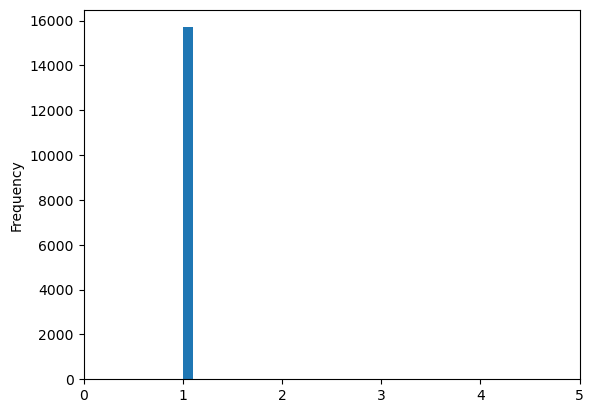

In [60]:
final_wikiroto_df.value_counts().plot.hist(xticks=range(0, 6))